In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import matplotlib

In [2]:
#matplotlib是比较总体化的画图方式，需要准备数据 设置很多参数
#而pandas的Series和DataFrame本身就有合理的结构，便于画图

<AxesSubplot:>

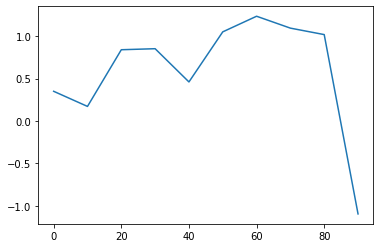

In [3]:
s = Series(np.random.randn(10).cumsum(),index=np.arange(0,100,10))
s.plot()
#x轴是index y轴是data
#值得注意的数据类型是AxesSubplot和matplotlib是一样的

<AxesSubplot:>

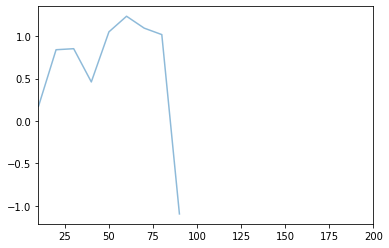

In [4]:
s.plot(xlim=[10,200],label='map',alpha=0.5)
#绘图有很多的参数可以按照要求去修改

In [5]:
df = DataFrame(np.random.randn(10,4).cumsum(0),
               columns=['A','B','C','D'],
               index=np.arange(0,100,10))
df

,A,B,C,D
0,1.665168,-1.489679,0.199761,1.258635
10,0.269498,-2.479546,0.837453,2.291235
20,1.415323,-2.114115,1.651107,2.805128
30,1.956681,-0.185194,1.090428,1.633259
40,1.656130,-0.168023,1.567516,-0.189263
50,1.971099,0.334588,1.861810,1.778596
60,1.499169,-0.656459,1.767692,-0.025905
70,3.149409,-0.258647,2.406035,-2.513982
80,2.146206,1.522394,2.183654,-2.636396
90,3.394292,1.823087,1.430327,-2.227918


<AxesSubplot:>

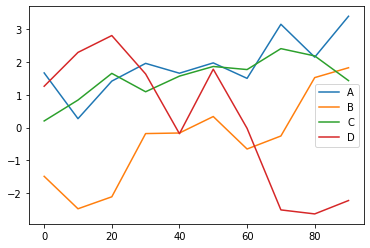

In [6]:
df.plot()
#DataFrame的plot方法会将每个列按照index画出

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

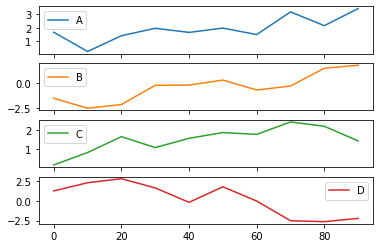

In [7]:
df.plot(subplots=True)
#同样地有一些参数可以调整

In [8]:
#柱状图 kind=bar/barh

<AxesSubplot:>

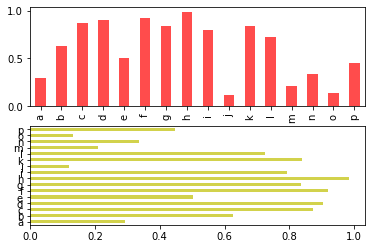

In [9]:
fig,axes = plt.subplots(2,1)
data = Series(np.random.rand(16),index=list('abcdefghijklmnop'))
data.plot(kind='bar',ax=axes[0],color='r',alpha=0.7)
data.plot(kind='barh',ax=axes[1],color='y',alpha=0.7)
#值得注意的是ax参数 用于显示定义要画的图位于哪个子图位置上

In [10]:
df1 = DataFrame(np.random.rand(6,4),
                index=['one','two','three','four','five','six'],
                columns=pd.Index(['A','B','C','D'],name='Genus'))
df1

Genus,A,B,C,D
one,0.081787,0.223355,0.335486,0.665082
two,0.041861,0.368358,0.713465,0.245152
three,0.527764,0.483967,0.716506,0.831880
four,0.690361,0.988758,0.714356,0.697341
five,0.008925,0.062929,0.693707,0.280526
six,0.457371,0.135110,0.307558,0.658303


<AxesSubplot:>

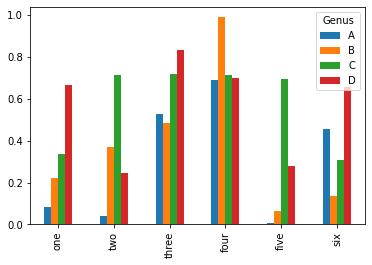

In [11]:
df1.plot(kind='bar')
#值得注意的是 DataFrame的plot方法则是会将每行（每个index）作为一组，每组内有多个列是column

<AxesSubplot:>

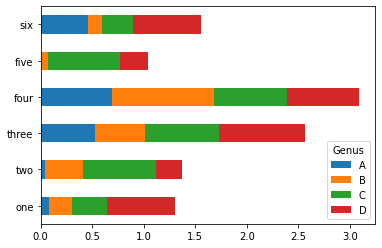

In [12]:
df1.plot(kind='barh',stacked=True)
#使用stacked则会将每个列叠起来

In [13]:
tips = pd.read_csv('../examples/tips.csv')
tips

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


In [14]:
party_counts = pd.crosstab(tips.day,tips['size'])
#crosstab做一张交叉表 第一个参数是index第二个参数是column
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [15]:
party_counts = party_counts.iloc[:,1:5]
party_counts

size,2,3,4,5
day,,,,
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3
Thur,48,4,5,1


In [16]:
party_pacts = party_counts.div(party_counts.sum(1).astype(float),axis=0)
party_pacts
#sum(1)按照行进行相加 div进行归一化使得每行的和为1

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


<AxesSubplot:xlabel='day'>

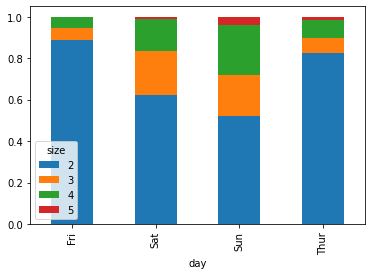

In [17]:
party_pacts.plot(kind='bar',stacked=True,sort_columns=False)

In [18]:
#直方图和密度图 hist kind='kde'

In [19]:
tips

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


In [20]:
tips['tip_pct'] = tips['tip']/tips['total_bill']
tips

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.059447
1,10.34,1.66,No,Sun,Dinner,3,0.160542
2,21.01,3.50,No,Sun,Dinner,3,0.166587
3,23.68,3.31,No,Sun,Dinner,2,0.139780
4,24.59,3.61,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,No,Sat,Dinner,2,0.098204


<AxesSubplot:>

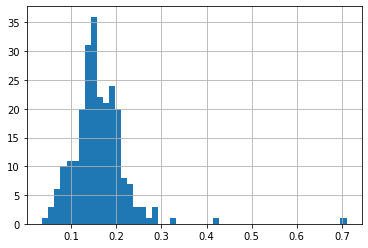

In [21]:
tips['tip_pct'].hist(bins=50)
#hist直方图是对值频率离散化的柱状图
#绘制各个区间内数据的次数

<AxesSubplot:ylabel='Density'>

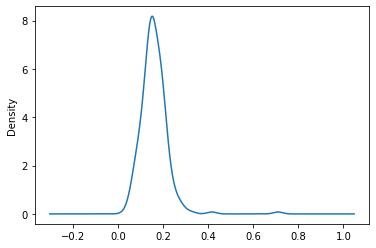

In [23]:
tips['tip_pct'].plot(kind='kde')
#kde Kernel Density Estimate图

<AxesSubplot:ylabel='Density'>

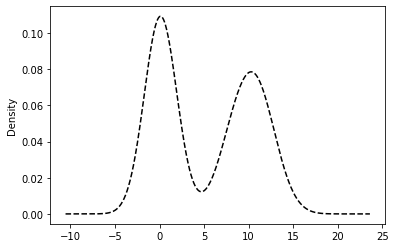

In [30]:
comp1 = np.random.normal(0,1,size=200)
comp2 = np.random.normal(10,2,size=200)
values = Series(np.concatenate([comp1,comp2]))
values.plot(kind='kde',style='k--')

<AxesSubplot:>

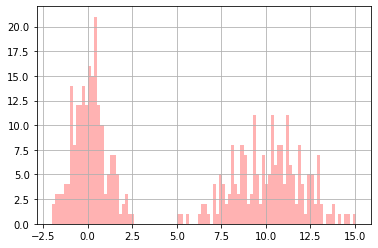

In [31]:
values.hist(bins=100,alpha=0.3,color='r')

In [ ]:
#散布图 scatter

In [32]:
macro = pd.read_csv('../examples/macrodata.csv')
macro

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,2008.0,3.0,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
199,2008.0,4.0,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
200,2009.0,1.0,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
201,2009.0,2.0,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


In [33]:
data1 = macro[['cpi','m1','tbilrate','unemp']]
data1

,cpi,m1,tbilrate,unemp
0,28.980,139.7,2.82,5.8
1,29.150,141.7,3.08,5.1
2,29.350,140.5,3.82,5.3
3,29.370,140.0,4.33,5.6
4,29.540,139.6,3.50,5.2
...,...,...,...,...
198,216.889,1474.7,1.17,6.0
199,212.174,1576.5,0.12,6.9
200,212.671,1592.8,0.22,8.1
201,214.469,1653.6,0.18,9.2


In [34]:
#计算对数差
trans_data = np.log(data1).diff().dropna()
trans_data

,cpi,m1,tbilrate,unemp
1,0.005849,0.014215,0.088193,-0.128617
2,0.006838,-0.008505,0.215321,0.038466
3,0.000681,-0.003565,0.125317,0.055060
4,0.005772,-0.002861,-0.212805,-0.074108
5,0.000338,0.004289,-0.266946,0.000000
...,...,...,...,...
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339


Text(0.5, 1.0, 'Changes in log m1 vs. log unemp')

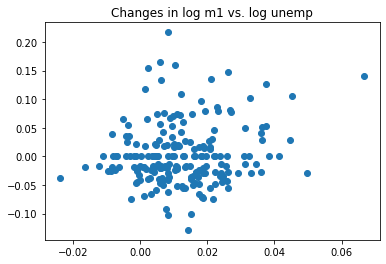

In [35]:
plt.scatter(trans_data['m1'],trans_data['unemp'])
#使用scatter可以做散点图
plt.title('Changes in log m1 vs. log unemp')

array([[<AxesSubplot:xlabel='cpi', ylabel='cpi'>,
        <AxesSubplot:xlabel='m1', ylabel='cpi'>,
        <AxesSubplot:xlabel='tbilrate', ylabel='cpi'>,
        <AxesSubplot:xlabel='unemp', ylabel='cpi'>],
       [<AxesSubplot:xlabel='cpi', ylabel='m1'>,
        <AxesSubplot:xlabel='m1', ylabel='m1'>,
        <AxesSubplot:xlabel='tbilrate', ylabel='m1'>,
        <AxesSubplot:xlabel='unemp', ylabel='m1'>],
       [<AxesSubplot:xlabel='cpi', ylabel='tbilrate'>,
        <AxesSubplot:xlabel='m1', ylabel='tbilrate'>,
        <AxesSubplot:xlabel='tbilrate', ylabel='tbilrate'>,
        <AxesSubplot:xlabel='unemp', ylabel='tbilrate'>],
       [<AxesSubplot:xlabel='cpi', ylabel='unemp'>,
        <AxesSubplot:xlabel='m1', ylabel='unemp'>,
        <AxesSubplot:xlabel='tbilrate', ylabel='unemp'>,
        <AxesSubplot:xlabel='unemp', ylabel='unemp'>]], dtype=object)

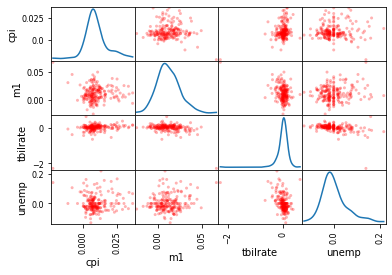

In [37]:
pd.plotting.scatter_matrix(trans_data,diagonal='kde',color='r',alpha=0.3)
#可以直接得到散布矩阵 对角线上是密度图kde 其他位置是两两结合的散点图
#很明显 沿着对角线对称的 类对称 颠了一下